In [110]:
#Imports
import library
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from math import pi

In [111]:
#Data import and column setting
data = library.loadList('exoplanet.csv')
col = {'name':0,'m':2,'rad':3,'sma':5,'temp':11}

In [113]:
#Getting density 
def getDensity(mass,radius):
    mass = float(mass)
    radius = float(radius)
    mass *= 1.898*(10**30)
    radius *= 6991100000
    density = mass / (4/3*(pi*radius**3))
    cleanDensity = round(density,2)
    return cleanDensity

#Getting colour based on density
def getColor(density):
    if density < 2:
        color = 'yellow'
    elif density >= 2 and density < 4:
        color = 'blue'
    elif density >= 4 and density < 6:
        color = 'red'
    else:
        color = 'black'
    return color

#Data processing for master list of name, sma, temperature, mass, and radius
masterList = []
for n in range(len(data)):
    name = data[n][col['name']]
    sma = data[n][col['sma']]
    temperature = data[n][col['temp']]
    mass = data[n][col['m']]
    radius = data[n][col['rad']]
    if mass != '' and radius != '':
        density = getDensity(mass,radius)
        color = getColor(density)
    if sma != '' and float(sma) <= 5000 and temperature != '':
        sma = float(sma)
        temperature = float(temperature)
        masterList += [[name, round(sma,2), round(temperature,2),round(density,2),color]]

#Printing the master list
print('[SEMI-MAJOR AXIS (AU), TEMPERATURE (KELVINS), DENSITY (extra), COLOR FOR PLOT (based on density)]:')
masterList.sort()
print(masterList)

[SEMI-MAJOR AXIS (AU), TEMPERATURE (KELVINS), DENSITY (extra), COLOR FOR PLOT (based on density)]:
[['4 UMa b', 0.87, 877.3, 1.37, 'yellow'], ['51 Eri b', 14.0, 700.0, 2.65, 'blue'], ['51 Peg b', 0.05, 1260.3, 0.13, 'yellow'], ['70 Vir b', 0.48, 479.1, 0.76, 'yellow'], ['CoRoT-1 b', 0.03, 1898.0, 0.41, 'yellow'], ['CoRoT-10 b', 0.11, 600.8, 4.0, 'red'], ['CoRoT-11 b', 0.04, 1593.4, 1.23, 'yellow'], ['CoRoT-12 b', 0.04, 1318.7, 0.41, 'yellow'], ['CoRoT-13 b', 0.05, 1166.5, 2.5, 'blue'], ['CoRoT-14 b', 0.03, 1781.4, 7.78, 'black'], ['CoRoT-16 b', 0.06, 1085.5, 0.44, 'yellow'], ['CoRoT-17 b', 0.05, 1486.4, 3.06, 'blue'], ['CoRoT-18 b', 0.03, 1396.0, 2.05, 'blue'], ['CoRoT-19 b', 0.05, 1515.3, 0.48, 'yellow'], ['CoRoT-2 b', 0.03, 1392.7, 1.4, 'yellow'], ['CoRoT-20 b', 0.09, 1002.0, 9.49, 'black'], ['CoRoT-21 b', 0.04, 1867.0, 1.36, 'yellow'], ['CoRoT-22 b', 0.09, 885.0, 0.62, 'yellow'], ['CoRoT-23 b', 0.05, 1508.9, 3.21, 'blue'], ['CoRoT-24 b', 0.06, 1070.0, 76.72, 'black'], ['CoRoT-24 c',

In [114]:
#Printing the master list as a dataframe
df = pd.DataFrame(masterList,columns=['Name','SemiMajorAxis','Temperature','Density','PlotColor'])
df

Name  SemiMajorAxis  Temperature  Density PlotColor
0        4 UMa b           0.87        877.3     1.37    yellow
1       51 Eri b          14.00        700.0     2.65      blue
2       51 Peg b           0.05       1260.3     0.13    yellow
3       70 Vir b           0.48        479.1     0.76    yellow
4      CoRoT-1 b           0.03       1898.0     0.41    yellow
..           ...            ...          ...      ...       ...
701    mu Arae b           1.50        228.7     0.19    yellow
702    mu Arae c           0.09        928.2     0.19    yellow
703    mu Arae d           0.92        292.1     0.19    yellow
704    mu Arae e           5.24        122.5     0.19    yellow
705  tau Boo A b           0.05       2000.0     2.48      blue

[706 rows x 5 columns]

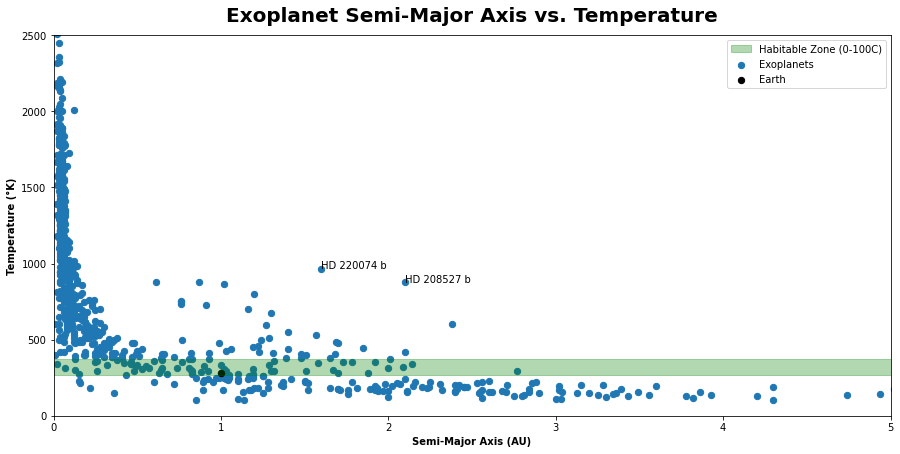

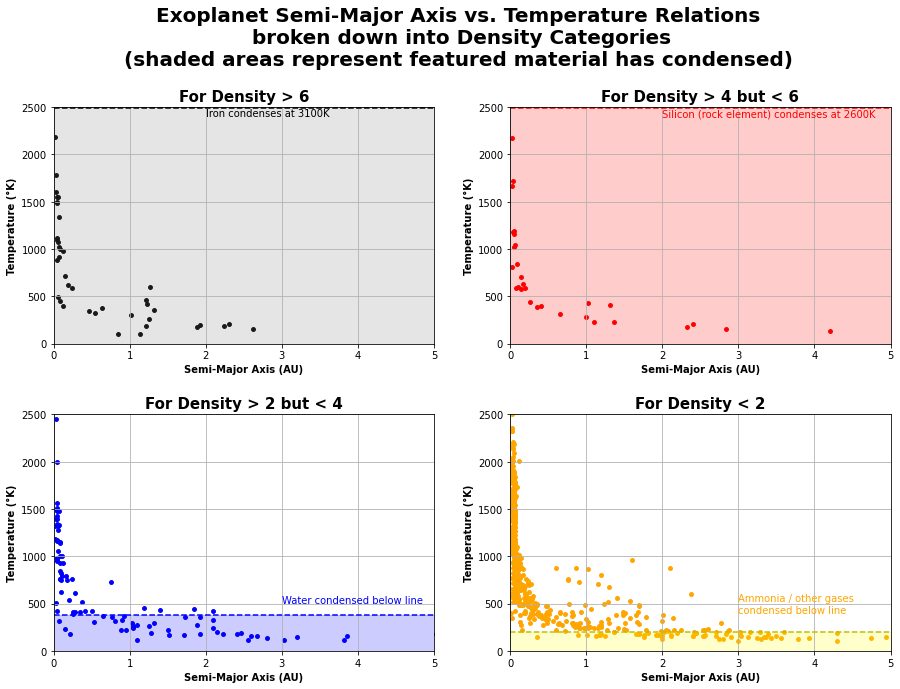

In [131]:
#FIRST GENERAL FIGURE
#Size
plt.figure(figsize=(15,7))
      
#Getting variables from dataframe
sma = df.SemiMajorAxis
temp = df.Temperature
#Scatter
plt.scatter(sma,temp,s=40)
#Labels and limits
plt.title('Exoplanet Semi-Major Axis vs. Temperature',fontweight='bold',fontsize=20,y=1.02)
plt.xlabel('Semi-Major Axis (AU)',fontweight='bold')
plt.xlim(0,5)
plt.ylabel('Temperature (°K)',fontweight='bold')
plt.ylim(0,2500)
#Labelling the habitable zone (270-370K)
plt.axhspan(270, 370,0,5,color='green',alpha=0.3)
#Scattering a point for Earth (where is it in the habitable zone?)
plt.scatter(1,280,s=40,c='black')
#Legend 
legendLabels = ['Habitable Zone (0-100C)','Exoplanets','Earth']
plt.legend(legendLabels,loc=1)
#Finding and labelling outliers from the master list
for i in range(len(masterList)):
    name = masterList[i][0]
    sma = float(masterList[i][1])
    temp = float(masterList[i][2])
    if sma > 1.5 and temp > 800: 
        plt.annotate(name,(sma,temp),color='black')
plt.show()

#SECOND FIGURE FOR BREAKDOWN
#Size
plt.figure(figsize=(15,10))

#Picking out all of the black (high density) values for planets
smaList = []
tempList = []
for i in range(len(masterList)):
    if masterList[i][4] == 'black':
        smaList.append(masterList[i][1])
        tempList.append(masterList[i][2])

#First subplot for high density
plt.subplot(221)
#Scatter 
plt.scatter(smaList,tempList,s=15,c='black')
#Axes / title
plt.title('For Density > 6',fontweight='bold',fontsize=15)
plt.xlabel('Semi-Major Axis (AU)',fontweight='bold')
plt.xlim(0,5)
plt.ylabel('Temperature (°K)',fontweight='bold')
plt.ylim(0,2500)
plt.grid(True) #grid reference for the line
#Adding line at top for condensation of iron
plt.hlines(y=2495,xmin=0,xmax=5,color='k',linestyle='dashed')
#Annotation of line
plt.annotate("Iron condenses at 3100K", xy=(1,1000), xytext=(2,2400), color='black')
#Shading everywhere below line (where iron is condensed)
plt.axhspan(0, 2500,0,5,color='grey',alpha=0.2)

#Picking out all red density planets
smaList = []
tempList = []
for i in range(len(masterList)):
    if masterList[i][4] == 'red':
        smaList.append(masterList[i][1])
        tempList.append(masterList[i][2])

#Second subplot
plt.subplot(222)
#Scatter
plt.scatter(smaList,tempList,s=15,c='red')
#Labels
plt.title('For Density > 4 but < 6',fontweight='bold',fontsize=15)
plt.xlabel('Semi-Major Axis (AU)',fontweight='bold')
plt.xlim(0,5)
plt.ylabel('Temperature (°K)',fontweight='bold')
plt.ylim(0,2500)
plt.grid(True) #grid reference
#Line for the condensation of Silicon (most rocks)
plt.hlines(y=2490,xmin=0,xmax=5,color='r',linestyle='dashed')
#Annotation
plt.annotate("Silicon (rock element) condenses at 2600K", xy=(2,1000), xytext=(2,2400), color='red')
#Shading of zone where silicon is condensed
plt.axhspan(0, 2500,0,5,color='red',alpha=0.2)

#Picking out all blue density planets
smaList = []
tempList = []
for i in range(len(masterList)):
    if masterList[i][4] == 'blue':
        smaList.append(masterList[i][1])
        tempList.append(masterList[i][2])

#3rd subplot
plt.subplot(223)
#Scatter
plt.scatter(smaList,tempList,s=15,c='blue')
#Labels
plt.title('For Density > 2 but < 4',fontweight='bold',fontsize=15)
plt.xlabel('Semi-Major Axis (AU)',fontweight='bold')
plt.xlim(0,5)
plt.ylabel('Temperature (°K)',fontweight='bold')
plt.ylim(0,2500)
plt.grid(True) #gird reference
#Line for the condensation of of water
plt.hlines(y=375,xmin=0,xmax=5,color='b',linestyle='dashed')
plt.annotate("Water condensed below line", xy=(4,1000), xytext=(3,500), color='blue')
#Shading for zones of water or ice (condensed water)
plt.axhspan(0, 375,0,5,color='blue',alpha=0.2)

#Picking out all yellow (low) density planets
smaList = []
tempList = []
for i in range(len(masterList)):
    if masterList[i][4] == 'yellow':
        smaList.append(masterList[i][1])
        tempList.append(masterList[i][2])

#Final Subplot
plt.subplot(224)
#Scatter
plt.scatter(smaList,tempList,s=15,c='orange')
#Labels
plt.title('For Density < 2',fontweight='bold',fontsize=15)
plt.xlabel('Semi-Major Axis (AU)',fontweight='bold')
plt.xlim(0,5)
plt.ylabel('Temperature (°K)',fontweight='bold')
plt.ylim(0,2500)
plt.grid(True) #grid for reference
#Line for the condensation temperature of ammonia and other gases
plt.hlines(y=200,xmin=0,xmax=5,color='y',linestyle='dashed')
plt.annotate("Ammonia / other gases \ncondensed below line", xy=(1,820), xytext=(3,400),color='orange')
#Zone where most gases are condensed (low temperatures/far from star)
plt.axhspan(0, 200, 0, 5,color='yellow',alpha=0.2)

#Overarching title for subplot
plt.suptitle('Exoplanet Semi-Major Axis vs. Temperature Relations\n broken down into Density Categories\n(shaded areas represent featured material has condensed)',
               fontweight='bold',fontsize=20,y=1.02)
#Padding
plt.subplots_adjust(hspace=0.3)
plt.show()